## Experiment Analysis
 ---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
twostages = pd.read_csv('https://s3.eu-central-1.amazonaws.com/maastrichtuniversity-ids-open/crowdED/20181024_stg2simulations.csv')
onestage = pd.read_csv('https://s3.eu-central-1.amazonaws.com/maastrichtuniversity-ids-open/crowdED/20181024_stg1simulations.csv')

In [3]:
len(twostages)

145152

In [4]:
#twostages = twostages.loc[:, twostages.columns != 'proportion_hard_tasks']

In [5]:
print('Number of simulations {}\nFailed simulations {}%'.format(
    len(twostages),round(len(twostages[twostages['accuracy'] == 0]) *100/ len(twostages)),2))

Number of simulations 145152
Failed simulations 16%


In [6]:
print('Number of simulations {}\nFailed simulations {}%'.format(
    len(onestage),round(len(onestage[onestage['accuracy'] == 0]) *100/ len(twostages)),2))

Number of simulations 145152
Failed simulations 0%


In [7]:
corr = twostages.corr()

In [8]:
corr

,total_tasks,total_workers,proportion_hard_tasks,proportion_train_tasks,workers_per_task,total_keys,accuracy,cross_entropy,f1
total_tasks,1.000000e+00,0.000000e+00,4.254063e-19,4.261799e-19,0.000000e+00,0.000000e+00,-0.013203,-0.001775,-0.011359
total_workers,0.000000e+00,1.000000e+00,5.191492e-19,2.675226e-18,0.000000e+00,0.000000e+00,0.478920,0.390626,0.478851
proportion_hard_tasks,4.254063e-19,5.191492e-19,1.000000e+00,9.225348e-17,0.000000e+00,-2.073196e-21,-0.104015,-0.045668,-0.105278
proportion_train_tasks,4.261799e-19,2.675226e-18,9.225348e-17,1.000000e+00,1.710300e-20,4.750289e-21,-0.047015,-0.013267,-0.047840
workers_per_task,0.000000e+00,0.000000e+00,0.000000e+00,1.710300e-20,1.000000e+00,0.000000e+00,-0.392096,-0.319472,-0.392006
total_keys,0.000000e+00,0.000000e+00,-2.073196e-21,4.750289e-21,0.000000e+00,1.000000e+00,0.073812,0.537989,0.072988
accuracy,-1.320280e-02,4.789197e-01,-1.040148e-01,-4.701495e-02,-3.920960e-01,7.381164e-02,1.000000,0.844715,0.999957
cross_entropy,-1.775480e-03,3.906260e-01,-4.566755e-02,-1.326662e-02,-3.194720e-01,5.379891e-01,0.844715,1.000000,0.844226
f1,-1.135903e-02,4.788515e-01,-1.052783e-01,-4.784040e-02,-3.920065e-01,7.298788e-02,0.999957,0.844226,1.000000


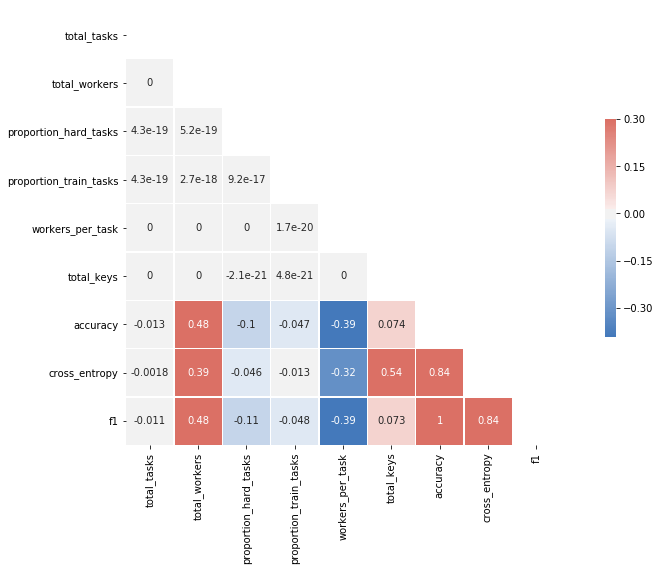

In [9]:
plt.figure(figsize=[16, 8])
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [447]:
twostages['ratio_tasks_wpt'] = twostages['total_tasks'] / twostages['workers_per_task']#*.1 #twostages['total_tasks'] / twostages['workers_per_task']#*.1
twostages['ratio_wpt_answers'] = twostages['workers_per_task'] / twostages['total_keys']
twostages['ratio_answers_tasks'] = twostages['total_keys'] / twostages['total_tasks'] #esta es la que importa

We created two additional variables that are dependent on the number of workers per task. The variables represent proportion of workers per task, we called ratios: r1: ratio of number of tasks over tge number of workers per task, and r2: the ratio of number of workers per task over the number of valid answers.
These two ratios help to find the best range of case scenarios of the amount of workers per tasks should be selected in a crowdsourcing experiment.
The calculation is as follows:  
$$Rwpt = ((1/r1 * N) + (r2 * n)) / 2$$
The average between the number of tasks times 1/r1 and the number of valid answers times r2  
r1 = number of tasks over number of workers per task  
r2 = number of workers per task over number of valid answers  
Rwpt = Recommended workers per task  
following this logic, if we have N = 100, n = 3, r1 = 30, r2 = 1  
Rwpt = ((1/30 * 90) + (1 * 3)) / 2  
Rwpt = 3  


## Accuracy one stage vs two stages

In [448]:
import scipy.stats as stats

In [449]:
df_two = twostages[twostages['accuracy'] != 0]
df_one = onestage.loc[[j for j in set(onestage.index)-set(twostages[twostages['accuracy'] == 0].index)]]

In [488]:
df_one.columns

Index(['total_tasks', 'total_workers', 'proportion_hard_tasks',
       'proportion_train_tasks', 'workers_per_task', 'total_keys', 'accuracy',
       'cross_entropy', 'f1'],
      dtype='object')

In [450]:
#mapping the working dataset
#df_two.to_csv('../crowdedsimulations.csv')

In [451]:
print('Average Accuracy \n One Stage: {} (SD {}) \n Two Stages: {} (SD {})'.format(
    round(df_one['accuracy'].mean(),3), round(df_one['accuracy'].std(),3), 
    round(df_two['accuracy'].mean(),3), round(df_two['accuracy'].std(),3)))

Average Accuracy 
 One Stage: 0.922 (SD 0.043) 
 Two Stages: 0.954 (SD 0.031)


In [489]:
print('Average Cross Entropy \n One Stage: {} (SD {}) \n Two Stages: {} (SD {})'.format(
    round(df_one['cross_entropy'].mean(),3), round(df_one['cross_entropy'].std(),3), 
    round(df_two['cross_entropy'].mean(),3), round(df_two['cross_entropy'].std(),3)))

Average Cross Entropy 
 One Stage: 2.943 (SD 0.798) 
 Two Stages: 2.943 (SD 0.797)


In [490]:
print('Average F1 \n One Stage: {} (SD {}) \n Two Stages: {} (SD {})'.format(
    round(df_one['f1'].mean(),3), round(df_one['f1'].std(),3), 
    round(df_two['f1'].mean(),3), round(df_two['f1'].std(),3)))

Average F1 
 One Stage: 0.92 (SD 0.043) 
 Two Stages: 0.953 (SD 0.031)


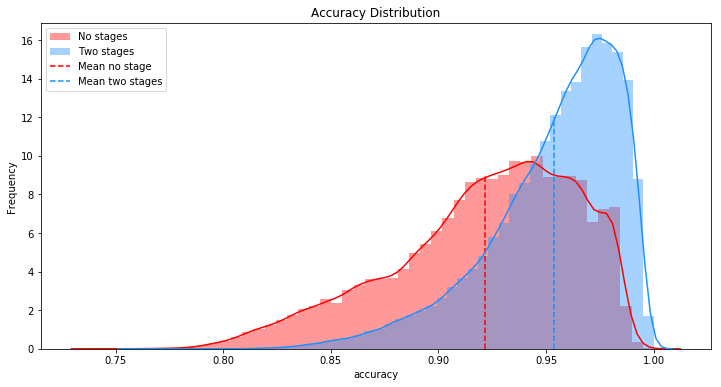

In [545]:
plt.figure(figsize=[12, 6])
sns.distplot(df_one['accuracy'], color='r', label='No stages')
sns.distplot(df_two['accuracy'], color='dodgerblue', label='Two stages')
plt.vlines(x=df_one['accuracy'].mean(),ymin=0,ymax=9, color='r', linestyles='--', label='Mean no stage')
plt.vlines(x=df_two['accuracy'].mean(),ymin=0,ymax=12, color='dodgerblue', linestyles='--', label='Mean two stages')
plt.ylabel('Frequency'); plt.title('Accuracy Distribution')
plt.legend()
plt.savefig('../accuracy_distribution.png')

Statistical difference

In [453]:
stats.ttest_rel(df_one['accuracy'],df_two['accuracy'])

Ttest_relResult(statistic=-436.26745612483825, pvalue=0.0)

Method with a training performs better

## The best scenarios in a 2 stage experiment

In [497]:
q = .8 #highest quantile to filter the best accuracy group (the best 20%)
df_filter = df_two[df_two['accuracy'] >= df_two.quantile(q)['accuracy']]

In [498]:
#get the best 20% on cross entropy
df_filter = df_filter[df_filter['cross_entropy'] <= df_filter.quantile(1-q)['cross_entropy']]

In [499]:
#considering hard task isn't relevant
df_filter = df_filter[df_filter['proportion_hard_tasks']==0].sort_values('accuracy', ascending = False)

In [500]:
df_filter.head()

,total_tasks,total_workers,proportion_hard_tasks,proportion_train_tasks,workers_per_task,total_keys,accuracy,cross_entropy,f1,ratio_wpt_tasks,ratio_wpt_answers,ratio_answers_tasks,ratio_tasks_wpt
18146,100,50,0.0,0.2,3,7,1.0,2.6818,1.0,0.0300,0.428571,0.070000,33.333333
24194,120,30,0.0,0.2,3,7,1.0,2.7621,1.0,0.0250,0.428571,0.058333,40.000000
9116,80,40,0.0,0.4,3,7,1.0,2.7853,1.0,0.0375,0.428571,0.087500,26.666667
1010,60,40,0.0,0.2,3,7,1.0,2.7520,1.0,0.0500,0.428571,0.116667,20.000000
15164,80,100,0.0,0.4,3,7,1.0,2.7740,1.0,0.0375,0.428571,0.087500,26.666667


In [501]:
df_filter = df_filter[['total_tasks','total_workers','proportion_train_tasks','workers_per_task','accuracy','cross_entropy','ratio_tasks_wpt','ratio_wpt_answers','ratio_answers_tasks']]

In [502]:
print('Best scenarios in a 2 stage experiment: {} ({}%)'.format(len(df_filter), round(len(df_filter)*100/len(df_two),2)))

Best scenarios in a 2 stage experiment: 3823 (3.12%)


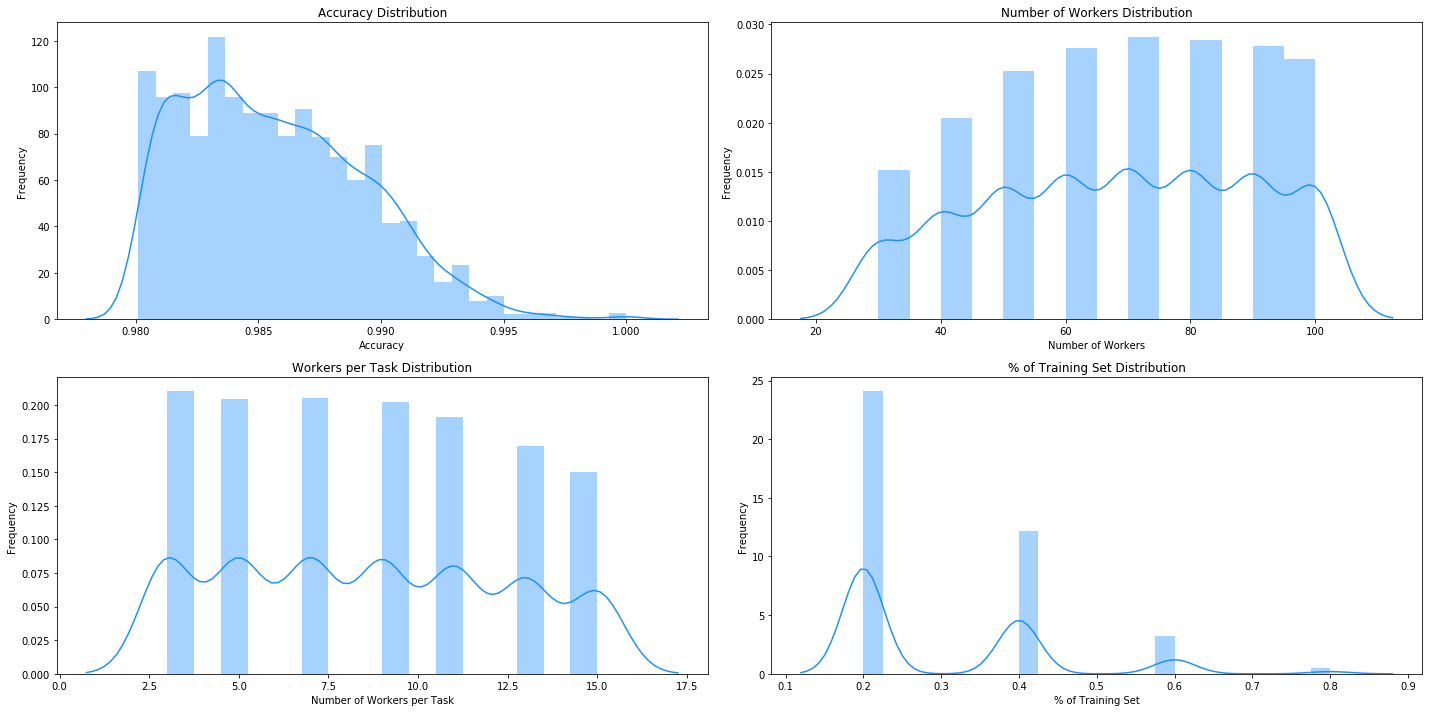

In [533]:
plt.figure(figsize=[20, 10])
plt.subplot(2,2,1)
sns.distplot(df_filter['accuracy'], color='dodgerblue', axlabel='Accuracy')
plt.ylabel('Frequency'); plt.title('Accuracy Distribution')
plt.subplot(2,2,2)
sns.distplot(df_filter['total_workers'], color='dodgerblue', axlabel='Number of Workers')
plt.ylabel('Frequency'); plt.title('Number of Workers Distribution')
plt.subplot(2,2,3)
sns.distplot(df_filter['workers_per_task'], color='dodgerblue', axlabel='Number of Workers per Task')
plt.ylabel('Frequency'); plt.title('Workers per Task Distribution')
plt.subplot(2,2,4)
sns.distplot(df_filter['proportion_train_tasks'], color='dodgerblue', axlabel='% of Training Set')
plt.ylabel('Frequency'); plt.title('% of Training Set Distribution')
plt.tight_layout()
plt.savefig('../distribution_best_scenarios.png')

In [540]:
df_filter.columns

Index(['total_tasks', 'total_workers', 'proportion_train_tasks',
       'workers_per_task', 'accuracy', 'cross_entropy', 'ratio_tasks_wpt',
       'ratio_wpt_answers', 'ratio_answers_tasks', 'Scaled Accuracy'],
      dtype='object')

In [509]:
print('Average Accuracy \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['accuracy'].mean(),3), round(df_filter['accuracy'].std(),3)))

Average Accuracy 
 Best Scenarios: 0.986 (SD 0.004)


In [513]:
print('Average Cross Entropy \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['cross_entropy'].mean(),3), round(df_filter['cross_entropy'].std(),3)))

Average Cross Entropy 
 Best Scenarios: 2.437 (SD 0.427)


In [539]:
print('Average Number of Workers \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['total_workers'].mean(),3), round(df_filter['total_workers'].std(),3)))

Average Number of Workers 
 Best Scenarios: 68.159 (SD 21.541)


In [544]:
print('Average Number Tasks \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['total_tasks'].mean(),3), round(df_filter['total_tasks'].std(),3)))

Average Number Tasks 
 Best Scenarios: 231.535 (SD 104.345)


In [541]:
print('Average % of Train Tasks \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['proportion_train_tasks'].mean(),3), round(df_filter['proportion_train_tasks'].std(),3)))

Average % of Train Tasks 
 Best Scenarios: 0.3 (SD 0.139)


In [542]:
print('Average Workers per Task \n Best Scenarios: {} (SD {})'.format(
    round(df_filter['workers_per_task'].mean(),3), round(df_filter['workers_per_task'].std(),3)))

Average Workers per Task 
 Best Scenarios: 8.602 (SD 3.906)


## Variables to support the recommendation

In [514]:
def renormalize(column):
    return (column - min(column)) / (max(column) - min(column))

In [515]:
df_filter['Scaled Accuracy'] = renormalize(df_filter['accuracy'])

In [548]:
#df_plot = df_filter[['accuracy','proportion_train_tasks','ratio_tasks_wpt','ratio_wpt_answers','ratio_answers_tasks','cross_entropy']]

In [549]:
#g = sns.PairGrid(df_plot)
#g.map_diag(sns.kdeplot)
#g.map_offdiag(sns.kdeplot)

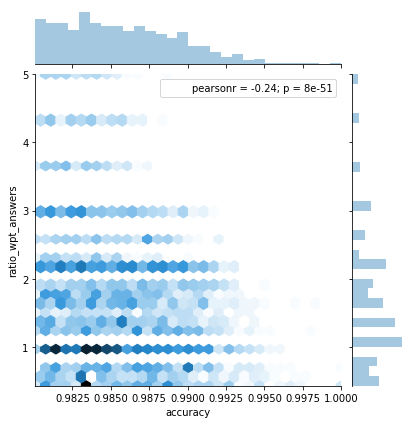

In [481]:
sns.jointplot(df_filter['accuracy'], df_filter['ratio_wpt_answers'], kind="hex")#.set_axis_labels("x", "y")

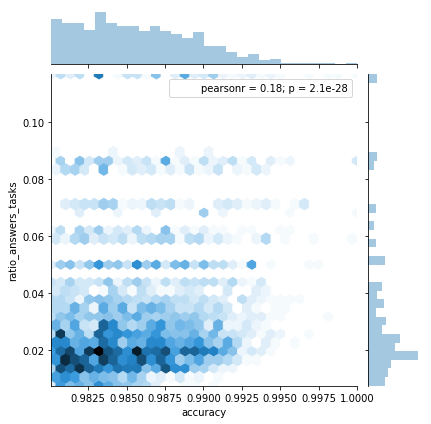

In [483]:
sns.jointplot(df_filter['accuracy'], df_filter['ratio_answers_tasks'], kind="hex")

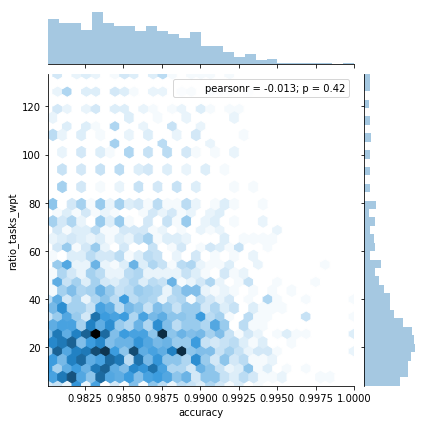

In [484]:
sns.jointplot(df_filter['accuracy'], df_filter['ratio_tasks_wpt'], kind="hex")

- The accuracy declains when we pick up more tasks to train (it happens the same with cross entropy)
- The accuracy is great when the ratio wpt-workers is between 10% and 20% if you have 50 workers then between 5 and 9 wpt (the same with corss entropy)
- Cross entropy has a positive correlation with ratio key-workers

Find the optimal to recomend

In [467]:
df_filter.columns

Index(['total_tasks', 'total_workers', 'proportion_train_tasks',
       'workers_per_task', 'accuracy', 'cross_entropy', 'ratio_tasks_wpt',
       'ratio_wpt_answers', 'ratio_answers_tasks', 'Accuracy'],
      dtype='object')

In [475]:
df = df_filter
trace = go.Scatter3d(
    z=df['Scaled Accuracy'].values,
    y=df['ratio_wpt_answers'].values,
    x=df['ratio_tasks_wpt'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=min(df['Scaled Accuracy'].values),
        size=df['Scaled Accuracy'].values*(25),#3,#6,
        color=df['proportion_train_tasks'].values,
        colorscale='Jet',   # choose a colorscale
        colorbar = dict(title = '% Tasks<br>to Train'),
        opacity=0.4
    )
)

In [546]:
layout = go.Layout(height=1100, width=1100, title='CrowdED Accuracy',
                  scene = dict(xaxis=dict(title='Ratio: Tasks/Workers per task'),
                               yaxis=dict(title='Ratio: Workers per task/Valid Answers'),
                               zaxis=dict(title='Scaled Accuracy')))

In [547]:
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

- ratio of keys and wpt debe should be low, around 20% to get crossentropy close to cero
- the proportion of workers among the total of tasks should be less than 20%
- the percentage set to train should be less than 30%